In [ ]:
### immigration sentiment recent patterns / split by VI

In [1]:
%%time
dataset_name = "W25_comb"
df_list = "BES_Panel"
#|BES_reduced_with_na"

%matplotlib inline 
%run BES_header.py {dataset_name} {df_list}

global BES_label_list, BES_df_list
# BES_reduced_with_na.index=BES_Panel.index

Toggle code

var_type (10365, 13)
CPU times: total: 2min 24s
Wall time: 2min 28s


In [2]:
BES_PanelW26 = pd.read_pickle("E:\\Users\\Gamer\\Documents\\GitHub\\BES_analysis\\BES_analysis_data\\W26_only\\BES2019_W26_v0.0.zip",
                                       compression='zip')
BES_PanelW26.columns = [ x+"W26" for x in BES_PanelW26.columns ]

In [4]:
BES_Panel[BES_PanelW26.columns] = BES_PanelW26

In [33]:
BES_Panel["countryW26"] = BES_Panel[search(BES_Panel,"^country").index].fillna(method='ffill',axis=1)["countryW25"]

In [7]:
search(BES_Panel,"immigSelf")

## weight values , weightW26
## immigSelf

## separate DKs

## split by?

immigSelfW7     30895
immigSelfW8     33502
immigSelfW9     30036
immigSelfW10    30237
immigSelfW11    30956
immigSelfW12     8984
immigSelfW13     1289
immigSelfW14    31063
immigSelfW15    30842
immigSelfW16    37959
immigSelfW17    34366
immigSelfW20    31468
immigSelfW21    30281
immigSelfW22    28113
immigSelfW23    30949
immigSelfW25    30407
immigSelfW26    27540
dtype: int64

In [49]:
wt_dict = {"immigSelfW"+x.split("W")[1].split("_result")[0]: x for x in search(BES_Panel,"wt_new_W\d+(_result$|$)").index}
wt_dict["immigSelfW26"]="weightW26"
wt_dict

{'immigSelfW10': 'wt_new_W10',
 'immigSelfW11': 'wt_new_W11',
 'immigSelfW14': 'wt_new_W14',
 'immigSelfW15': 'wt_new_W15',
 'immigSelfW16': 'wt_new_W16',
 'immigSelfW18': 'wt_new_W18',
 'immigSelfW20': 'wt_new_W20',
 'immigSelfW21': 'wt_new_W21',
 'immigSelfW22': 'wt_new_W22',
 'immigSelfW23': 'wt_new_W23',
 'immigSelfW24': 'wt_new_W24',
 'immigSelfW25': 'wt_new_W25',
 'immigSelfW12': 'wt_new_W12',
 'immigSelfW13': 'wt_new_W13_result',
 'immigSelfW17': 'wt_new_W17',
 'immigSelfW19': 'wt_new_W19_result',
 'immigSelfW9': 'wt_new_W9',
 'immigSelfW8': 'wt_new_W8',
 'immigSelfW7': 'wt_new_W7',
 'immigSelfW6': 'wt_new_W6',
 'immigSelfW26': 'weightW26'}

In [28]:
data = BES_Panel[search(BES_Panel,"immigSelf").index].reset_index().melt(id_vars=["id"])

data["wave"] = data["variable"].apply(lambda x: int(x.split("W")[1]))
data["var_name"] = data["variable"].apply(lambda x: x.split("W")[0])

data = data[data["value"].notnull()]

In [31]:
data["value_num"] = data["value"].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan)
data["value_dk"] = data["value"]=="Don't know"
data.loc[data["value"].isnull(),"value_dk"] = np.nan
data["country"] = data.apply(lambda x: BES_Panel.loc[x["id"],
                                          "countryW"+str(x["wave"])],axis=1)
data["weight"] = data.apply(lambda x: BES_Panel.loc[x["id"],
                                          wt_dict[x["variable"]]],axis=1)

In [46]:


# slow, but not insance

In [47]:
data["country"].value_counts(dropna=False)

country
England     396055
Scotland     51541
Wales        31267
NaN             24
Name: count, dtype: int64

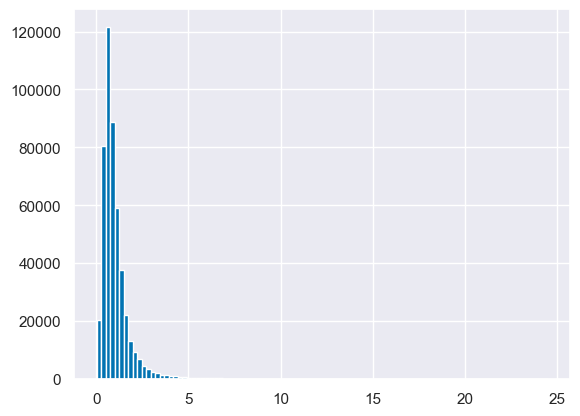

In [54]:
data["weight"].hist(bins=100);

(0.0, 10.0)

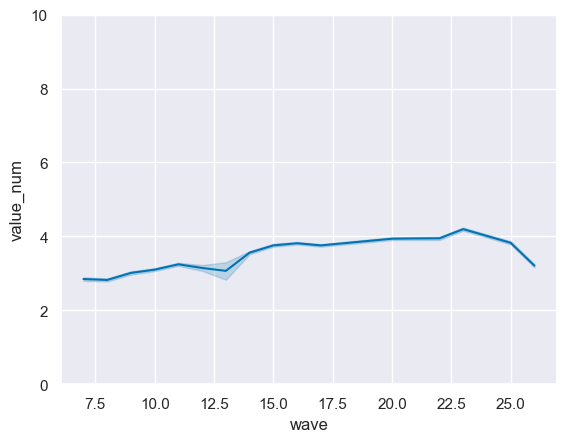

In [57]:
sns.lineplot(data=data,x="wave",y="value_num",weights="weight");
plt.ylim([0,10]);

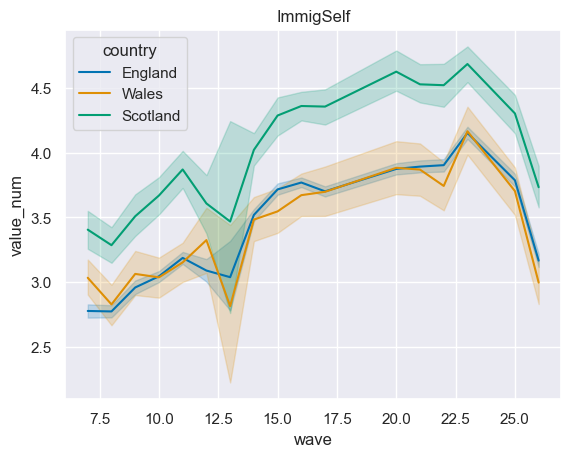

In [59]:
sns.lineplot(data=data,x="wave",y="value_num",weights="weight",hue="country");
plt.title("ImmigSelf");

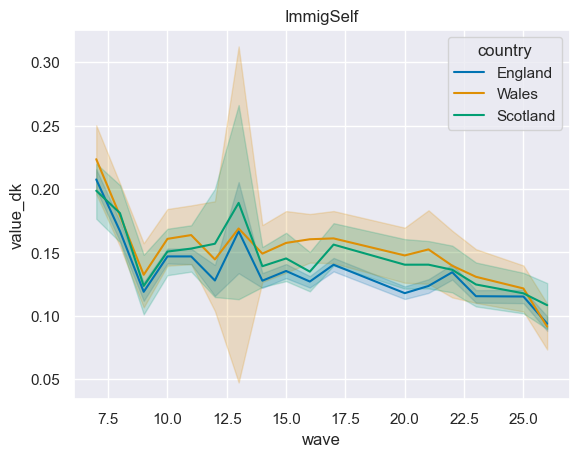

In [62]:
sns.lineplot(data=data,x="wave",y="value_dk",weights="weight",hue="country");
plt.title("ImmigSelf");

In [61]:
search(BES_Panel,"immig(Econ|Cultural)")

immigEconW1         30539
immigCulturalW1     30539
immigEconW2         30894
immigCulturalW2     30894
immigEconW3         28564
immigCulturalW3     28564
immigEconW4         31551
immigCulturalW4     31551
immigEconW7         30895
immigCulturalW7     30895
immigEconW8         33502
immigCulturalW8     33502
immigEconW10        30237
immigCulturalW10    30237
immigEconW11        30956
immigCulturalW11    30956
immigEconW13        31135
immigCulturalW13    31135
immigEconW14        31063
immigCulturalW14    31063
immigEconW15        30842
immigCulturalW15    30842
immigEconW16        37959
immigCulturalW16    37959
immigEconW17        34366
immigCulturalW17    34366
immigEconW20        31468
immigCulturalW20    31468
immigEconW22        28113
immigEconW23        30949
immigEconW24         2577
immigCulturalW24     2580
immigEconW25        30407
immigEconW26        27540
dtype: int64

In [70]:
varname = "immigEcon"

data = BES_Panel[search(BES_Panel,varname).index].reset_index().melt(id_vars=["id"])

wt_dict = {varname+"W"+x.split("W")[1].split("_result")[0]: x for x in search(BES_Panel,"wt_(new_W\d+|full_W\d)(_result$|$)").index}
wt_dict[varname+"W26"]="weightW26"
wt_dict

data["wave"] = data["variable"].apply(lambda x: int(x.split("W")[1]))
data["var_name"] = data["variable"].apply(lambda x: x.split("W")[0])

data = data[data["value"].notnull()]

data["value_num"] = data["value"].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan)
data["value_dk"] = data["value"]=="Don't know"
data.loc[data["value"].isnull(),"value_dk"] = np.nan
data["country"] = data.apply(lambda x: BES_Panel.loc[x["id"],
                                          "countryW"+str(x["wave"])],axis=1)
data["weight"] = data.apply(lambda x: BES_Panel.loc[x["id"],
                                          wt_dict[x["variable"]]],axis=1)

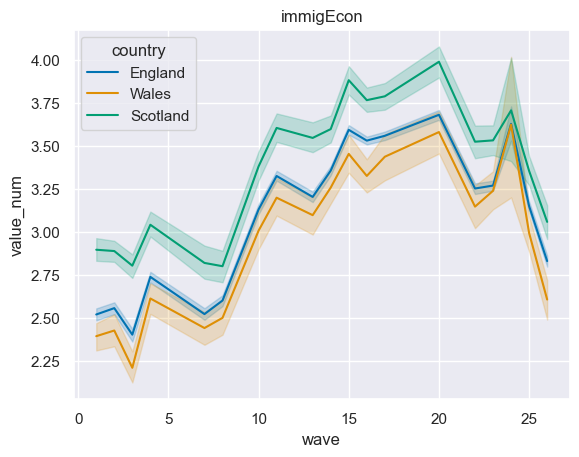

In [71]:
sns.lineplot(data=data,x="wave",y="value_num",weights="weight",hue="country");
plt.title(varname);

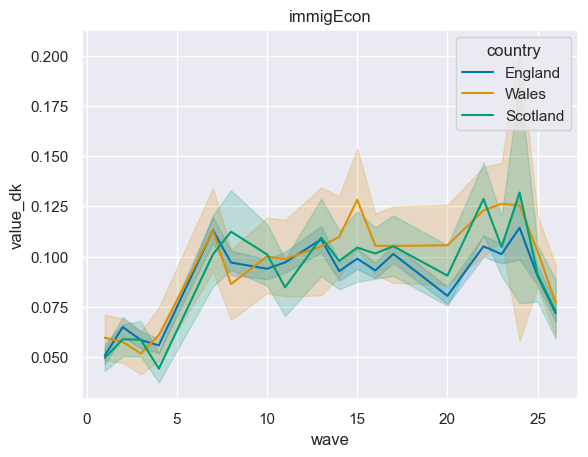

In [72]:
sns.lineplot(data=data,x="wave",y="value_dk",weights="weight",hue="country");
plt.title(varname);

In [73]:
varname = "immigCultural"

data = BES_Panel[search(BES_Panel,varname).index].reset_index().melt(id_vars=["id"])

wt_dict = {varname+"W"+x.split("W")[1].split("_result")[0]: x for x in search(BES_Panel,"wt_(new_W\d+|full_W\d)(_result$|$)").index}
# wt_dict[varname+"W26"]="weightW26"
wt_dict

data["wave"] = data["variable"].apply(lambda x: int(x.split("W")[1]))
data["var_name"] = data["variable"].apply(lambda x: x.split("W")[0])

data = data[data["value"].notnull()]

data["value_num"] = data["value"].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan)
data["value_dk"] = data["value"]=="Don't know"
data.loc[data["value"].isnull(),"value_dk"] = np.nan
data["country"] = data.apply(lambda x: BES_Panel.loc[x["id"],
                                          "countryW"+str(x["wave"])],axis=1)
data["weight"] = data.apply(lambda x: BES_Panel.loc[x["id"],
                                          wt_dict[x["variable"]]],axis=1)

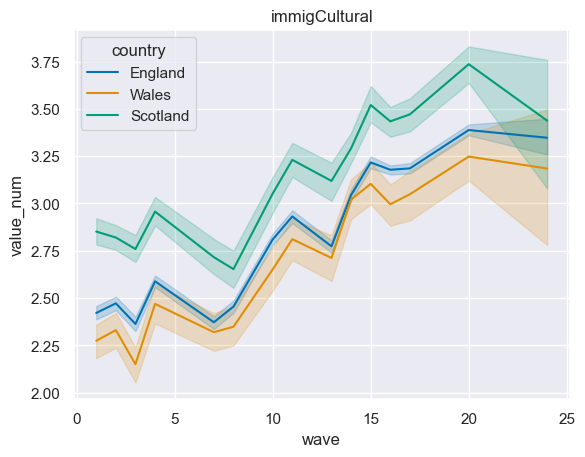

In [74]:
sns.lineplot(data=data,x="wave",y="value_num",weights="weight",hue="country");
plt.title(varname);

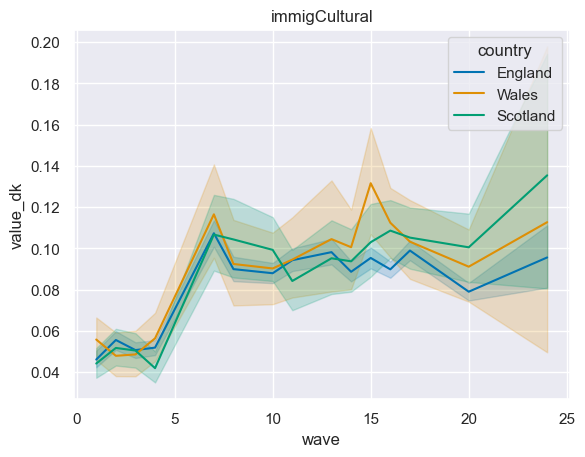

In [75]:
sns.lineplot(data=data,x="wave",y="value_dk",weights="weight",hue="country");
plt.title(varname);